In [13]:
import json
import re
import random
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [14]:
with open('syntax.json', 'r', encoding='utf-8') as f:
    data = json.load(f) 

In [15]:
llm_data = []
cfg_data = []
for item in data:
    if item['source'] == 'llm':
        llm_data.append(item)
    if item['source'] == 'cfg':
        cfg_data.append(item)

In [32]:
translate = {
    'simple': 'простое',
    'complex': 'сложное',
    'question_simple': 'простое',
    'question_complex': 'сложное',
    'incentive_simple': 'простое',
    'incentive_complex': 'сложное'}

In [33]:
def visualize_vectors(data, title, e_vectors=True):
    X_sample = []
    labels = []

    for item in data:
        if e_vectors:
            X_sample.append(item['best_vectors'][0])
        else:
            X_sample.append(item['best_vectors'][1])
        if translate.get(item['category'], None):
            labels.append(translate[item['category']])
    X_sample = np.array(X_sample)

    random_state = 42
    X_tsne = TSNE(n_components=2, perplexity=15, metric='cosine', random_state=random_state).fit_transform(X_sample)

    plt.figure(figsize=(10, 8))
    unique_labels = sorted(set(labels))
    for label in unique_labels:
        idx = [i for i, l in enumerate(labels) if l == label]
        plt.scatter(X_tsne[idx, 0], X_tsne[idx, 1], label=label, s=40, edgecolors='k')
    plt.title(title)
    plt.legend()
    plt.show()

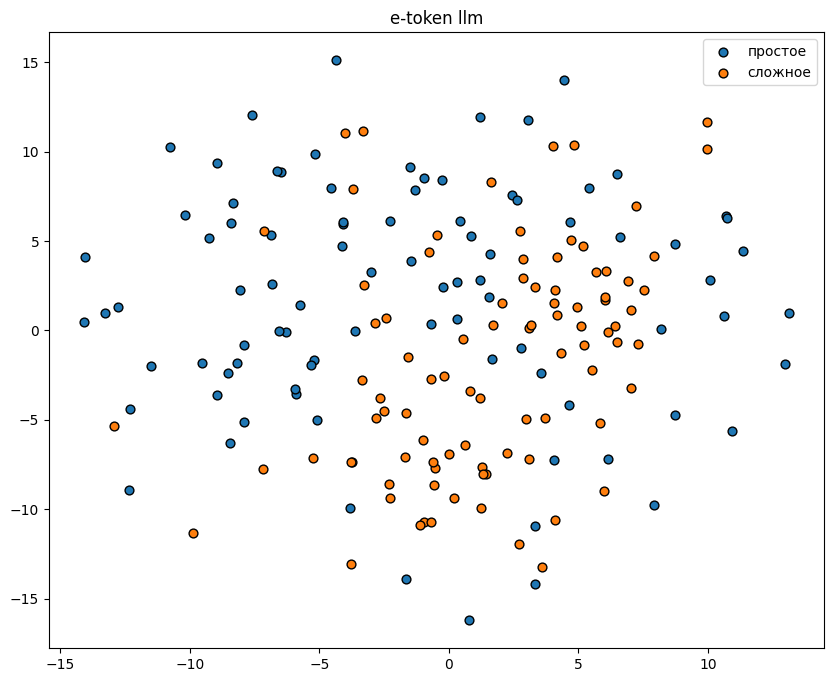

In [34]:
visualize_vectors(llm_data, 'e-token llm', True)

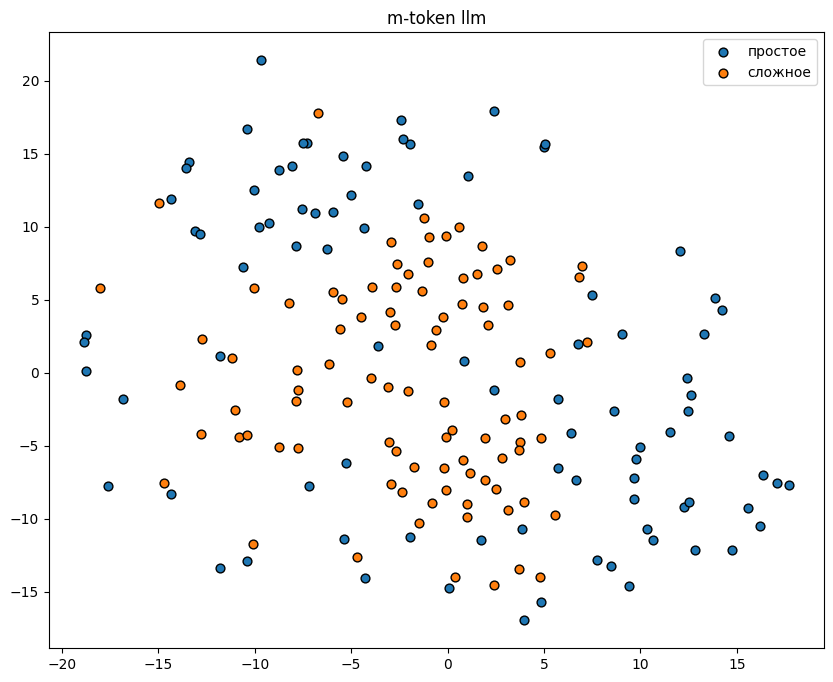

In [35]:
visualize_vectors(llm_data, 'm-token llm', False)

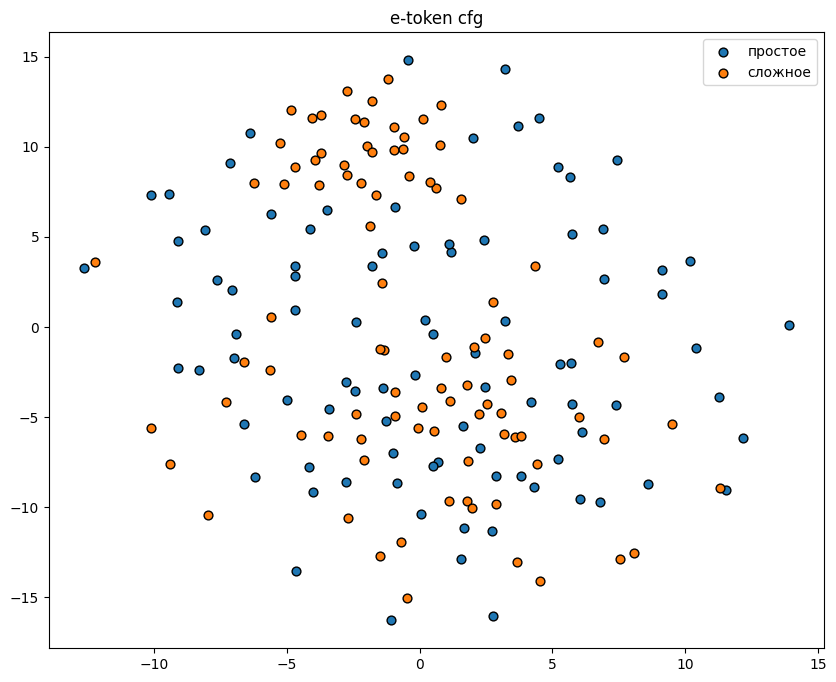

In [36]:
visualize_vectors(cfg_data, 'e-token cfg', True)

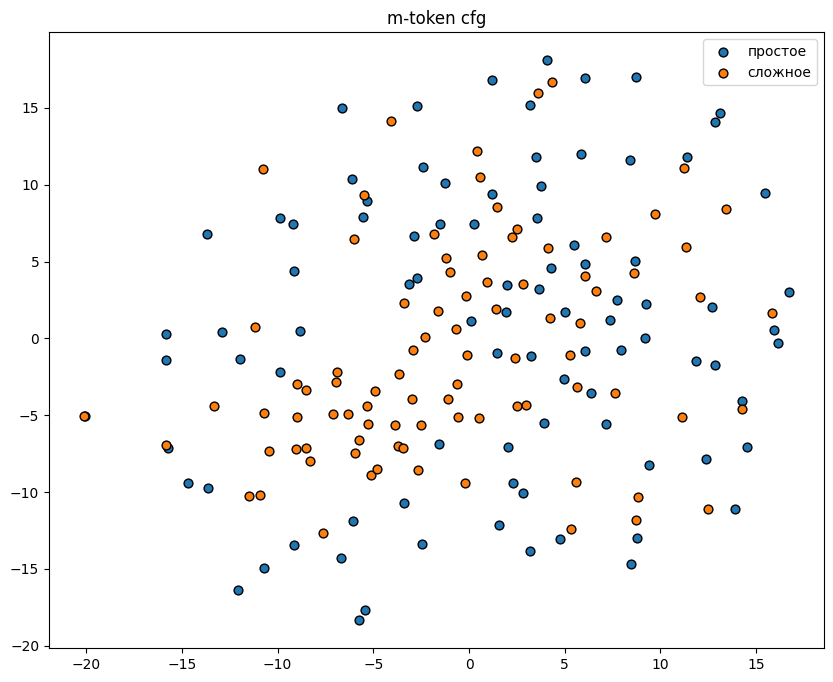

In [37]:
visualize_vectors(cfg_data, 'm-token cfg', False)

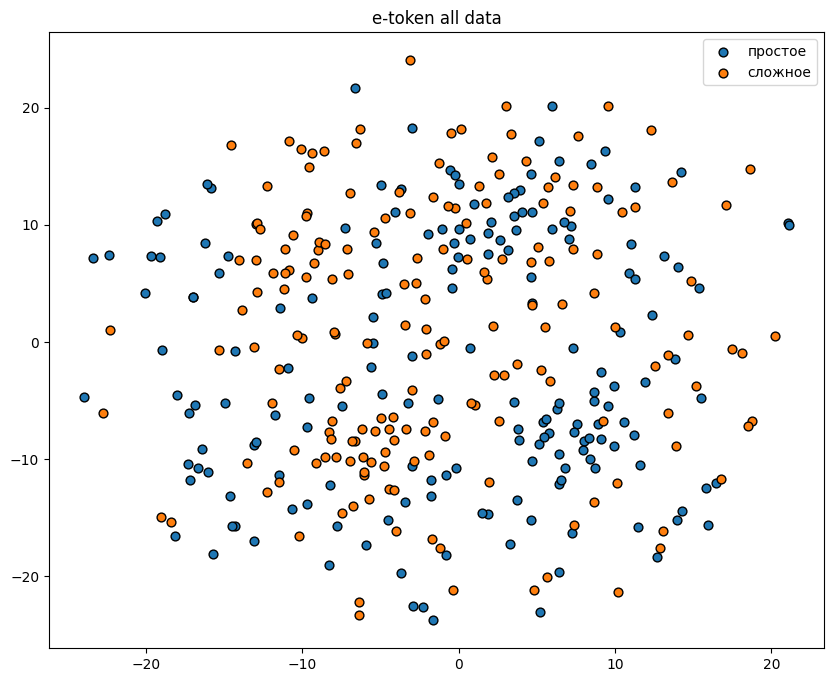

In [38]:
visualize_vectors(data, 'e-token all data', True)

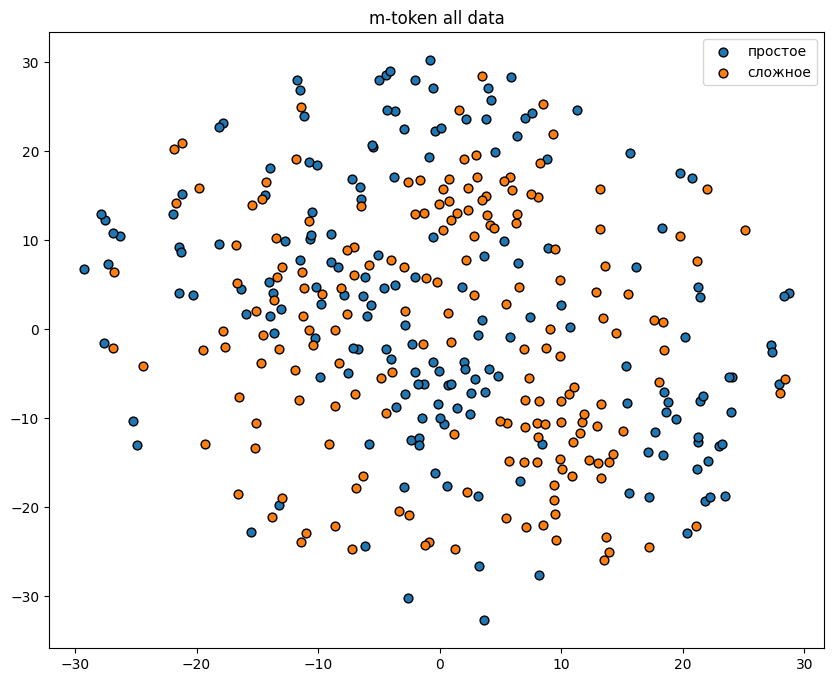

In [39]:
visualize_vectors(data, 'm-token all data', False)

In [12]:
def get_stat(data, category):
    lengths = []
    for item in data:
        if item['category'] == category:
            lengths.append(len(item['text'].split(' ')))
    lengths = np.array(lengths)
    mu = sum(lengths) / len(lengths)
    std = np.sqrt(sum((lengths - mu) ** 2) / (len(lengths) - 1))
    return mu, std

In [13]:
for i in range(len(cfg_data)):
    cfg_data[i]['text'] = re.sub(r"\s+([,?])", r"\1", cfg_data[i]['text'])

In [14]:
print('Данные с LLM:')
print('-------------')
categories = ['simple', 'complex', 'question_simple', 'question_complex', 'incentive_simple', 'incentive_complex', 'one_part']
for cat in categories:
    mu, std = get_stat(llm_data, cat)
    print(f'Категория: {translate[cat]}')
    print(f'Среднее длины: {mu}')
    print(f'Стандартное отклонение длины: {std}')
    print()

print('Данные с контекстно свободных грамматик')
print('---------------------------------------')
for cat in categories:
    mu, std = get_stat(cfg_data, cat)
    print(f'Категория: {translate[cat]}')
    print(f'Среднее длины: {mu}')
    print(f'Стандартное отклонение длины: {std}')
    print()

Данные с LLM:
-------------
Категория: простое
Среднее длины: 3.0
Стандартное отклонение длины: 0.0

Категория: сложное
Среднее длины: 6.533333333333333
Стандартное отклонение длины: 0.507416263404925

Категория: вопросительное простое
Среднее длины: 3.033333333333333
Стандартное отклонение длины: 0.18257418583505527

Категория: вопросительное сложное
Среднее длины: 6.806451612903226
Стандартное отклонение длины: 0.8334408532787307

Категория: побудительное простое
Среднее длины: 2.4827586206896552
Стандартное отклонение длины: 0.6876819060735034

Категория: побудительное сложное
Среднее длины: 4.133333333333334
Стандартное отклонение длины: 0.5713464637233658

Категория: односоставное
Среднее длины: 1.0
Стандартное отклонение длины: 0.0

Данные с контекстно свободных грамматик
---------------------------------------
Категория: простое
Среднее длины: 3.0
Стандартное отклонение длины: 0.0

Категория: сложное
Среднее длины: 10.0
Стандартное отклонение длины: 0.0

Категория: вопросительно

In [15]:
print('Данные с LLM:')
print('-------------')
for cat in categories:
    samples = random.sample([item['text'] for item in llm_data if item['category'] == cat], 3)
    print(f'Категория: {translate[cat]}')
    for i, s in enumerate(samples):
        print(f'{i + 1}. {s}')
    print()

print('Данные с контекстно свободных грамматик')
print('---------------------------------------')
for cat in categories:
    samples = random.sample([item['text'] for item in cfg_data if item['category'] == cat], 3)
    print(f'Категория: {translate[cat]}')
    for i, s in enumerate(samples):
        print(f'{i + 1}. {s}')
    print()

Данные с LLM:
-------------
Категория: простое
1. The woman reads.
2. The man walks.
3. The sun rises.

Категория: сложное
1. The student, stressed from exams, studies
2. The candle, small and weak, burns
3. The horse, tired from the ride, stops

Категория: вопросительное простое
1. Do fish swim?
2. Do phones ring?
3. Do clocks tick?

Категория: вопросительное сложное
1. Can the cat jump from the chair?
2. Will the rain stop in an hour?
3. Can the bird fly without wings?

Категория: побудительное простое
1. Open the box
2. Jump high
3. Drink water

Категория: побудительное сложное
1. See the stars clearly
2. Wait patiently until dawn
3. Speak softly to the child

Категория: односоставное
1. Rain
2. Wind
3. Jump

Данные с контекстно свободных грамматик
---------------------------------------
Категория: простое
1. the action be
2. the plan do
3. the theory free

Категория: сложное
1. the words, free in the words, say never and never
2. the need, federal in the need, become however and ho